## 1. Read the CSV file into a pandas dataframe. (1 pt)

In [3]:
import pandas as pd

bike_data = pd.read_csv('https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD')

In [4]:
bike_data.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,03/31/2019 11:00:00 PM,6.0,10.0
1,03/31/2019 10:00:00 PM,7.0,14.0
2,03/31/2019 09:00:00 PM,18.0,15.0
3,03/31/2019 08:00:00 PM,26.0,31.0
4,03/31/2019 07:00:00 PM,30.0,58.0


## 2. Add columns to the dataframe containing: ( 3 pt)
### i) The total (East + West) bicycle count
### ii) The hour of the day
### iii) The year

In [5]:
bike_data['East + West'] = bike_data['Fremont Bridge East Sidewalk'] + bike_data['Fremont Bridge West Sidewalk']
bike_data.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,East + West
0,03/31/2019 11:00:00 PM,6.0,10.0,16.0
1,03/31/2019 10:00:00 PM,7.0,14.0,21.0
2,03/31/2019 09:00:00 PM,18.0,15.0,33.0
3,03/31/2019 08:00:00 PM,26.0,31.0,57.0
4,03/31/2019 07:00:00 PM,30.0,58.0,88.0


In [6]:
type(bike_data['Date'])

pandas.core.series.Series

In [16]:
bike_data.dtypes

Date                            datetime64[ns]
Fremont Bridge East Sidewalk           float64
Fremont Bridge West Sidewalk           float64
East + West                            float64
Year                                     int64
Hour                                     int64
dtype: object

In [9]:
bike_data['Date'] = pd.to_datetime(bike_data['Date'])

In [15]:
bike_data.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,East + West,Year,Hour
0,2019-03-31 23:00:00,6.0,10.0,16.0,2019,23
1,2019-03-31 22:00:00,7.0,14.0,21.0,2019,22
2,2019-03-31 21:00:00,18.0,15.0,33.0,2019,21
3,2019-03-31 20:00:00,26.0,31.0,57.0,2019,20
4,2019-03-31 19:00:00,30.0,58.0,88.0,2019,19


In [14]:
bike_data['Year'], bike_data['Hour'] = bike_data['Date'].dt.year, bike_data['Date'].dt.hour

## 3. Create a dataframe with the subset of data from the year 2016 (1 pt)

In [17]:
bike_data_2016 = bike_data[bike_data['Year']==2016]

In [19]:
bike_data_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 19680 to 28463
Data columns (total 6 columns):
Date                            8784 non-null datetime64[ns]
Fremont Bridge East Sidewalk    8783 non-null float64
Fremont Bridge West Sidewalk    8783 non-null float64
East + West                     8783 non-null float64
Year                            8784 non-null int64
Hour                            8784 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 480.4 KB


In [20]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56904 entries, 0 to 56903
Data columns (total 6 columns):
Date                            56904 non-null datetime64[ns]
Fremont Bridge East Sidewalk    56895 non-null float64
Fremont Bridge West Sidewalk    56895 non-null float64
East + West                     56895 non-null float64
Year                            56904 non-null int64
Hour                            56904 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 2.6 MB


## 4. Use pandas + matplotlib to plot the counts by hour. (i.e. hour of the day on the x-axis, total daily counts on the y-axis) (1 pt)

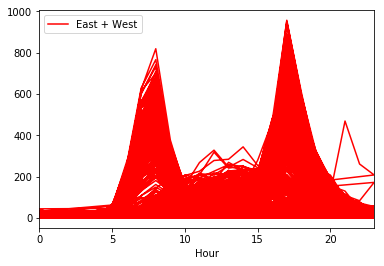

In [23]:
import matplotlib.pyplot as plt

bike_data_2016.plot(x='Hour',y='East + West',color='red')
plt.show()

## 5. Use pandas to determine what is (on average) the busiest hour of the day (1 pt)

In [27]:
bike_data_groupByHour = bike_data.loc[:,['East + West','Hour']].groupby(by=['Hour']).mean()
bike_data_groupByHour

,East + West
Hour,
0,11.632644
1,6.113876
2,4.080727
3,2.983551
4,6.557149
5,25.799241
6,90.043442
7,225.537326
8,317.905103


In [30]:
bike_data_groupByHour['East + West'].idxmax()

17